## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats 

sns.set_theme()

In [2]:
import sys
import os


module_path =os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\scripts")

if module_path not in sys.path:
    sys.path.append(module_path+"\\models")


In [3]:
from univariate import Univariate,readCSV
from loaddata import ReadData
from aggregarefunctions import aggregateClass
from knn import Models

## Read Dataset

In [4]:
dataRead=ReadData('../data/processed_data3.csv')
data=dataRead.readCsv()

Reading Data...

Successfully read the dataset ...


In [5]:
data.head()

,Bearer Id,Start,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes),Avg Bearer TP DL (Mbps),Avg Bearer TP UL (Mbps),Activity Duration DL (s),Activity Duration UL (s),Total UL+DL (Bytes),Total Session (Mbs),Duration Class
0,13114483460844900352,2019-04-04 12:01:18,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,5.000000,23.0,...,17855187.0,292426453.0,180558843.0,0.022461,0.042969,37.624,38.787,345629377.0,493.406131,Outlier
1,13114483482878900224,2019-04-09 13:04:04,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.0,...,35565545.0,609920783.0,541959383.0,0.015625,0.025391,0.168,3.560,707185356.0,1176.919550,Outlier
2,13114483484080500736,2019-04-09 17:42:11,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,109.795706,17.662883,6.0,...,23751202.0,229980251.0,414908351.0,0.005859,0.008789,0.000,0.000,307690973.0,685.103951,Outlier
3,13114483485442799616,2019-04-10 00:31:25,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,109.795706,17.662883,44.0,...,15092588.0,810387875.0,761837216.0,0.042969,0.042969,3.330,37.882,889352748.0,1562.493020,Outlier
4,13114483499480700928,2019-04-12 20:10:23,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,109.795706,17.662883,6.0,...,17539799.0,531237049.0,564619822.0,0.005859,0.008789,0.000,0.000,607681403.0,1104.727653,Outlier


**User Metrics to Track**
*	sessions frequency 
*	the duration of the session 
*	the sessions total traffic (download and upload (bytes))


In [6]:
#create a constructor for our python aggregateClass script
aggFunc=aggregateClass(data)


## Top Customers per Engagement 

### Session Frequency

We calculate this metric by getting the total number of xDR session per user. A user is identified by a unique **MSISDN/Number**

In [7]:
userData=data.groupby(['MSISDN/Number'])['Bearer Id'].nunique().sort_values(ascending=False)
userData=pd.DataFrame(userData)
userData.columns=['No of xDR sessions']

sessionData=userData['No of xDR sessions']

userData.head(10)

,No of xDR sessions
MSISDN/Number,
3.362632e+10,18
3.361489e+10,17
3.362578e+10,17
3.365973e+10,16
3.376054e+10,15
3.367588e+10,15
3.366716e+10,14
3.362708e+10,12
3.376041e+10,12


In [8]:
sessionDF=pd.DataFrame(sessionData)

In [9]:
sessionDF['MSISDN/Number']=sessionDF.index

In [10]:
sessionDF.reset_index(drop=True,inplace=True)

In [11]:
sessionDF

,No of xDR sessions,MSISDN/Number
0,18,3.362632e+10
1,17,3.361489e+10
2,17,3.362578e+10
3,16,3.365973e+10
4,15,3.376054e+10
...,...,...
106851,1,3.366069e+10
106852,1,3.366069e+10
106853,1,3.366069e+10
106854,1,3.366069e+10


### Total Session Duration

The session duration is acquired by summing up all session times per individual user

In [12]:
aggFunc.aggregateSumTwo('MSISDN/Number','Dur. (ms).1','Dur. (ms).1',10)

,Dur. (ms).1
MSISDN/Number,
3.362578e+10,185537.54
3.361489e+10,99668.98
3.376054e+10,92794.34
3.366716e+10,91578.46
3.362632e+10,87919.27
3.366284e+10,66142.70
3.366469e+10,62887.30
3.360313e+10,62877.61
3.366746e+10,56498.82


### Total Session Traffic 

In [13]:
aggFunc.aggregateSumTwo('MSISDN/Number','Total Session (Mbs)','Total Session (Mbs)',10)

,Total Session (Mbs)
MSISDN/Number,
3.361489e+10,15584.491763
3.362632e+10,15255.588619
3.362578e+10,14020.226793
3.367588e+10,13881.859133
3.365973e+10,13245.023117
3.376054e+10,12497.722857
3.366646e+10,11034.684769
3.362695e+10,11031.452587
3.366716e+10,10866.008883


In [14]:
data.columns

Index(['Bearer Id', 'Start', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI',
       'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media Total (Bytes)',
       'Google Total (Bytes)', 'Email Total (Bytes)', 'Youtube Total (Bytes)',
       'Netflix Total (Bytes)', 'Gaming Total (Bytes)', 'Other Tot

In [15]:
#create a new dataFrame with 
data2=data.groupby(['MSISDN/Number','Handset Type','IMEI','Last Location Name','IMSI','Handset Manufacturer']).agg({'Bearer Id':'count','Dur. (ms).1':sum,'Avg RTT DL (ms)':sum,'Avg RTT UL (ms)':sum,'Avg Bearer TP DL (kbps)':sum,'Avg Bearer TP UL (kbps)':sum,'TCP DL Retrans. Vol (Bytes)':sum,'TCP UL Retrans. Vol (Bytes)':sum,'HTTP DL (Bytes)':sum,'HTTP UL (Bytes)':sum,'Activity Duration DL (ms)':sum,'Activity Duration UL (ms)':sum,'Social Media DL (Bytes)':sum,'Social Media UL (Bytes)':sum,'Google DL (Bytes)':sum,'Google UL (Bytes)':sum,'Email DL (Bytes)':sum,'Email UL (Bytes)':sum,'Youtube DL (Bytes)':sum,'Youtube UL (Bytes)':sum,'Netflix DL (Bytes)':sum,'Netflix UL (Bytes)':sum,'Gaming DL (Bytes)':sum,'Gaming UL (Bytes)':sum,'Other DL (Bytes)':sum,'Other UL (Bytes)':sum,'Total UL (Bytes)':sum,'Total DL (Bytes)':sum,'Social Media Total (Bytes)':sum,'Google Total (Bytes)':sum,'Email Total (Bytes)':sum,'Youtube Total (Bytes)':sum,'Netflix Total (Bytes)':sum,'Gaming Total (Bytes)':sum,'Other Total (Bytes)':sum,'Avg Bearer TP DL (Mbps)':sum,'Avg Bearer TP UL (Mbps)':sum,'Avg Bearer TP UL (Mbps)':sum,'Activity Duration DL (s)':sum,'Activity Duration UL (s)':sum,'Total UL+DL (Bytes)':sum,'Total Session (Mbs)':sum}).reset_index()

data2

,MSISDN/Number,Handset Type,IMEI,Last Location Name,IMSI,Handset Manufacturer,Bearer Id,Dur. (ms).1,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes),Avg Bearer TP DL (Mbps),Avg Bearer TP UL (Mbps),Activity Duration DL (s),Activity Duration UL (s),Total UL+DL (Bytes),Total Session (Mbs)
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E,8.627420e+13,L74538A,2.082014e+14,Huawei,1,1167.20,46.000000,0.000000,...,21624548.0,27180981.0,8.124587e+08,386570872.0,0.036133,0.038086,26.588,33.662,8.786906e+08,1197.612347
1,3.360100e+10,Apple iPhone 7 (A1778),3.553261e+13,D12741B,2.082015e+14,Apple,1,1812.30,30.000000,1.000000,...,12432223.0,11221763.0,1.197501e+08,281710071.0,0.046875,0.049805,49.283,54.751,1.568596e+08,416.200012
2,3.360100e+10,undefined,3.561271e+13,L96414B,2.082019e+14,undefined,1,1349.69,109.795706,17.662883,...,21333570.0,19353900.0,5.388277e+08,501693672.0,0.046875,0.047852,16.793,18.434,5.959665e+08,1040.509209
3,3.360101e+10,Apple iPhone 5S (A1457),3.520491e+13,D93721A,2.082017e+14,Apple,1,498.78,69.000000,15.000000,...,6977321.0,1942092.0,3.911261e+08,35279702.0,0.199219,0.042969,12.097,4.497,4.223207e+08,426.834773
4,3.360101e+10,Apple iPhone Se (A1723),3.530681e+13,D54104C,2.082015e+14,Apple,2,371.04,114.000000,5.000000,...,41533002.0,49201724.0,1.314798e+09,804804484.0,39.448242,16.063477,4642.908,3133.148,1.457411e+09,2131.514222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119024,3.379000e+10,Huawei Honor 9 Lite,8.687980e+13,T93842C,2.082014e+14,Huawei,1,88.10,42.000000,10.000000,...,26647843.0,14902538.0,6.603614e+08,295282817.0,9.744141,0.377930,259.862,241.044,7.146416e+08,959.427761
119025,3.379000e+10,Apple iPhone 8 Plus (A1897),3.529761e+13,D42155B,2.082010e+14,Apple,1,1409.88,34.000000,6.000000,...,19851572.0,8531060.0,4.370033e+08,211115113.0,0.066406,0.046875,33.435,39.006,4.803073e+08,653.212936
119026,3.197021e+12,Quectel Wireless. Quectel Ec25-E,8.667580e+13,L70386B,2.040808e+14,Quectel Wireless Solutions Co Ltd,1,8773.85,109.795706,17.662883,...,11959905.0,26592300.0,1.780487e+08,470526473.0,0.000977,0.000000,0.000,0.000,2.321240e+08,667.383262
119027,3.370000e+14,Huawei B525S-23A,8.619200e+13,T89979A,2.082095e+14,Huawei,1,2530.30,109.795706,17.662883,...,36734940.0,30905042.0,5.101427e+08,149188439.0,0.010742,0.021484,8.829,10.540,5.962878e+08,706.331140


## Kmeans Classifier

We create a new dataframe containing all the above metrics per user 

In [16]:
aggData=data[['Dur. (ms).1','Total Session (Mbs)','MSISDN/Number']]

In [17]:
aggData

,Dur. (ms).1,Total Session (Mbs),MSISDN/Number
0,18236.520000,493.406131,3.366496e+10
1,13651.040000,1176.919550,3.368185e+10
2,13617.620000,685.103951,3.376063e+10
3,13215.090000,1562.493020,3.375034e+10
4,10890.090000,1104.727653,3.369980e+10
...,...,...,...
149996,812.300000,605.648632,3.365069e+10
149997,979.700000,1352.276146,3.366345e+10
149998,982.490000,714.110837,3.362189e+10
149999,979.100000,1159.892205,3.361962e+10


In [18]:
# No of xDR sessions
aggrData=data.groupby(['MSISDN/Number']).agg({'Dur. (ms).1':sum,'Total Session (Mbs)':sum,'Bearer Id':'count'})
aggrData=aggrData.rename(columns={'Bearer Id': 'No Sessions'})
aggrData

,Dur. (ms).1,Total Session (Mbs),No Sessions
MSISDN/Number,,,
3.360100e+10,1167.20,1197.612347,1
3.360100e+10,1812.30,416.200012,1
3.360100e+10,1349.69,1040.509209,1
3.360101e+10,498.78,426.834773,1
3.360101e+10,371.04,2131.514222,2
...,...,...,...
3.379000e+10,88.10,959.427761,1
3.379000e+10,1409.88,653.212936,1
3.197021e+12,8773.85,667.383262,1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Bearer Id                    150001 non-null  object 
 1   Start                        150001 non-null  object 
 2   Dur. (ms)                    150001 non-null  float64
 3   IMSI                         150001 non-null  float64
 4   MSISDN/Number                150001 non-null  float64
 5   IMEI                         150001 non-null  float64
 6   Last Location Name           150001 non-null  object 
 7   Avg RTT DL (ms)              150001 non-null  float64
 8   Avg RTT UL (ms)              150001 non-null  float64
 9   Avg Bearer TP DL (kbps)      150001 non-null  float64
 10  Avg Bearer TP UL (kbps)      150001 non-null  float64
 11  TCP DL Retrans. Vol (Bytes)  150001 non-null  float64
 12  TCP UL Retrans. Vol (Bytes)  150001 non-null  float64
 13 

In [20]:
data.columns

Index(['Bearer Id', 'Start', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI',
       'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media Total (Bytes)',
       'Google Total (Bytes)', 'Email Total (Bytes)', 'Youtube Total (Bytes)',
       'Netflix Total (Bytes)', 'Gaming Total (Bytes)', 'Other Tot

In [21]:
# newData=pd.merge(aggData,sessionDF,on='MSISDN/Number')

In [22]:
# aggData=aggData.groupby(['MSISDN/Number']).agg({'Dur. (ms).1':sum,'Total Session (Mbs)':sum})

In [23]:
# aggreDf=pd.merge(aggData,sessionDF,on='MSISDN/Number')
# aggreDf

In [24]:
# aggreDf=newData.groupby(['MSISDN/Number']).agg({'Dur. (ms).1':sum,'Total Session (Mbs)':sum,'No of xDR sessions':sum})

In [25]:
skewedData=aggrData[['Dur. (ms).1','Total Session (Mbs)','No Sessions']]


In [26]:
skewedData

,Dur. (ms).1,Total Session (Mbs),No Sessions
MSISDN/Number,,,
3.360100e+10,1167.20,1197.612347,1
3.360100e+10,1812.30,416.200012,1
3.360100e+10,1349.69,1040.509209,1
3.360101e+10,498.78,426.834773,1
3.360101e+10,371.04,2131.514222,2
...,...,...,...
3.379000e+10,88.10,959.427761,1
3.379000e+10,1409.88,653.212936,1
3.197021e+12,8773.85,667.383262,1


In [27]:
#we need to scale our data before we can pass it to the model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
minMax=MinMaxScaler()
ss=StandardScaler()
normalizedData=ss.fit_transform(skewedData)

In [28]:
normalizedData

array([[-0.16089109, -0.03685698, -0.49499518],
       [ 0.18363006, -1.00237154, -0.49499518],
       [-0.06343075, -0.23097391, -0.49499518],
       ...,
       [ 3.90150513, -0.69200904, -0.49499518],
       [ 0.56708407, -0.64388497, -0.49499518],
       [ 3.86123178, -0.89408478, -0.49499518]])

In [29]:
#we fit a pca for dimensionality reduction to two 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcaData=pca.fit_transform(normalizedData)

#### Visual Clusters

Visual representation of clusters from the pca data after classification

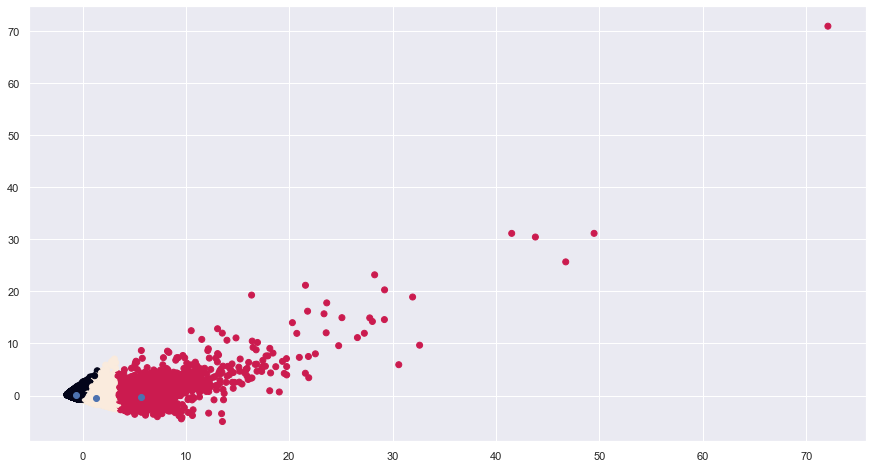

In [30]:
knn=Models(pcaData)
knn.visualizePlot(3,'b',cmap='RdPu')

In [31]:
predictions=knn.knnPreds(3)
np.unique(predictions)


array([0, 1, 2])

Our data has been classified into 3 distinct classess

## Skewed Data Clusters

Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

In [65]:
knn=Models(skewedData)
clusters=knn.knnPreds(3)


In [66]:
clusters

array([0, 0, 0, ..., 1, 0, 1])

In [67]:
skewedData['Engagement Cluster']=clusters

# results=data2.merge(skewedData,how='left')

In [68]:
#we calculate number of users per cluster
(unique, counts) = np.unique(predictions, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[    0, 78298],
       [    1, 24792],
       [    2,  3766]], dtype=int64)

In [76]:
skewed=skewedData.reset_index()

### Average of Clusters

In [69]:
skewedData.groupby(['Engagement Cluster']).agg({'Dur. (ms).1':np.mean,'Total Session (Mbs)':np.mean,'No Sessions':np.mean})

,Dur. (ms).1,Total Session (Mbs),No Sessions
Engagement Cluster,,,
0,1050.218036,1039.668108,1.197544
1,3877.332252,2419.915626,2.709312
2,23182.054437,5666.614180,6.475352


In [70]:
skewedData.groupby(['Engagement Cluster']).agg({'Dur. (ms).1':min,'Total Session (Mbs)':min,'No Sessions':min})

,Dur. (ms).1,Total Session (Mbs),No Sessions
Engagement Cluster,,,
0,71.42,55.658620,1
1,1168.00,92.234064,1
2,13222.51,455.162277,1


In [71]:
skewedData.groupby(['Engagement Cluster']).agg({'Dur. (ms).1':max,'Total Session (Mbs)':max,'No Sessions':max})

,Dur. (ms).1,Total Session (Mbs),No Sessions
Engagement Cluster,,,
0,3183.82,4746.471464,5
1,13756.12,8269.153392,11
2,185537.54,15584.491763,18


In [72]:
skewedData.groupby(['Engagement Cluster']).agg({'Dur. (ms).1':sum,'Total Session (Mbs)':sum,'No Sessions':sum})

,Dur. (ms).1,Total Session (Mbs),No Sessions
Engagement Cluster,,,
0,9.765662e+07,9.667562e+07,111356
1,5.267356e+07,3.287455e+07,36806
2,6.583703e+06,1.609318e+06,1839


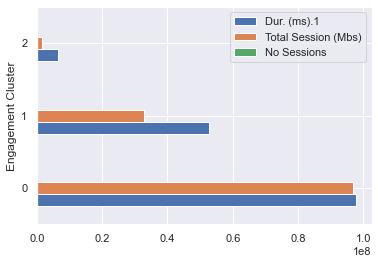

In [73]:
skewedData.groupby(['Engagement Cluster']).agg({'Dur. (ms).1':sum,'Total Session (Mbs)':sum,'No Sessions':sum}).plot(kind='barh')

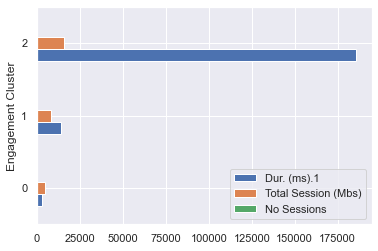

In [74]:
skewedData.groupby(['Engagement Cluster']).agg({'Dur. (ms).1':max,'Total Session (Mbs)':max,'No Sessions':max}).plot(kind='barh')

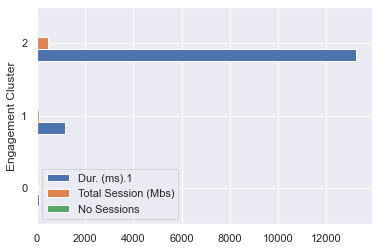

In [75]:
skewedData.groupby(['Engagement Cluster']).agg({'Dur. (ms).1':min,'Total Session (Mbs)':min,'No Sessions':min}).plot(kind='barh')

In [ ]:
skewedData.groupby(['Engagement Cluster']).agg({'Dur. (ms).1':np.mean,'Total Session (Mbs)':np.mean,'No Sessions':np.mean}).plot(kind='barh')

### Findings


**Cluster 0** seems to be for people who have fewer number of seesions on average they have the least number of metric averages we can confidently say that this cluster is that of users with the least engagements. 

**Cluster 1** can be interprated as the cluster with moderate user engagments. This users fairly use the company's resources to access various platforms on the internet

**Cluster 2** can be identified as heavy user engagments they are user who use the services on a day to day basis and very often  

In [77]:
finalCluster=skewed[['MSISDN/Number','Engagement Cluster']]
clustered3=pd.merge(finalCluster, data2, on='MSISDN/Number')
clustered3

,MSISDN/Number,Engagement Cluster,Handset Type,IMEI,Last Location Name,IMSI,Handset Manufacturer,Bearer Id,Dur. (ms).1,Avg RTT DL (ms),...,Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes),Avg Bearer TP DL (Mbps),Avg Bearer TP UL (Mbps),Activity Duration DL (s),Activity Duration UL (s),Total UL+DL (Bytes),Total Session (Mbs)
0,3.360100e+10,0,Huawei P20 Lite Huawei Nova 3E,8.627420e+13,L74538A,2.082014e+14,Huawei,1,1167.20,46.000000,...,21624548.0,27180981.0,8.124587e+08,386570872.0,0.036133,0.038086,26.588,33.662,8.786906e+08,1197.612347
1,3.360100e+10,0,Apple iPhone 7 (A1778),3.553261e+13,D12741B,2.082015e+14,Apple,1,1812.30,30.000000,...,12432223.0,11221763.0,1.197501e+08,281710071.0,0.046875,0.049805,49.283,54.751,1.568596e+08,416.200012
2,3.360100e+10,0,undefined,3.561271e+13,L96414B,2.082019e+14,undefined,1,1349.69,109.795706,...,21333570.0,19353900.0,5.388277e+08,501693672.0,0.046875,0.047852,16.793,18.434,5.959665e+08,1040.509209
3,3.360101e+10,0,Apple iPhone 5S (A1457),3.520491e+13,D93721A,2.082017e+14,Apple,1,498.78,69.000000,...,6977321.0,1942092.0,3.911261e+08,35279702.0,0.199219,0.042969,12.097,4.497,4.223207e+08,426.834773
4,3.360101e+10,0,Apple iPhone Se (A1723),3.530681e+13,D54104C,2.082015e+14,Apple,2,371.04,114.000000,...,41533002.0,49201724.0,1.314798e+09,804804484.0,39.448242,16.063477,4642.908,3133.148,1.457411e+09,2131.514222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119024,3.379000e+10,0,Huawei Honor 9 Lite,8.687980e+13,T93842C,2.082014e+14,Huawei,1,88.10,42.000000,...,26647843.0,14902538.0,6.603614e+08,295282817.0,9.744141,0.377930,259.862,241.044,7.146416e+08,959.427761
119025,3.379000e+10,0,Apple iPhone 8 Plus (A1897),3.529761e+13,D42155B,2.082010e+14,Apple,1,1409.88,34.000000,...,19851572.0,8531060.0,4.370033e+08,211115113.0,0.066406,0.046875,33.435,39.006,4.803073e+08,653.212936
119026,3.197021e+12,1,Quectel Wireless. Quectel Ec25-E,8.667580e+13,L70386B,2.040808e+14,Quectel Wireless Solutions Co Ltd,1,8773.85,109.795706,...,11959905.0,26592300.0,1.780487e+08,470526473.0,0.000977,0.000000,0.000,0.000,2.321240e+08,667.383262
119027,3.370000e+14,0,Huawei B525S-23A,8.619200e+13,T89979A,2.082095e+14,Huawei,1,2530.30,109.795706,...,36734940.0,30905042.0,5.101427e+08,149188439.0,0.010742,0.021484,8.829,10.540,5.962878e+08,706.331140


In [79]:
clustered3.to_csv('../data/clustered3.csv',index=False)

## User Engagement per App 

Aggregate user total traffic per application and derive the top 10 most engaged users per application

### Total Traffic on all Applications

In [ ]:
data.groupby(['MSISDN/Number']).agg({
    
    'Social Media Total (Bytes)':sum,
    
    'Google Total (Bytes)':sum,
    
    'Email Total (Bytes)':sum,
    
    'Youtube Total (Bytes)':sum,
   
    'Netflix Total (Bytes)':sum,
   
    'Gaming Total (Bytes)':sum,
    
    'Other Total (Bytes)':sum,
    'Total Session (Mbs)':sum
 
    })

### Social Media

In [ ]:
aggFunc.aggregateSumTwo('MSISDN/Number','Social Media Total (Bytes)','Social Media Total (Bytes)',10)

In [ ]:
data['Application Total (Mbs)']=(data['Social Media Total (Bytes)']+data['Google Total (Bytes)']+data['Email Total (Bytes)']+data['Youtube Total (Bytes)']+data['Netflix Total (Bytes)']+data['Gaming Total (Bytes)']+data['Other Total (Bytes)'])/1024

In [ ]:
data

In [ ]:
aggFunc.aggregateSumTwo('MSISDN/Number','Google Total (Bytes)','Google Total (Bytes)',10)

### Email

In [ ]:
aggFunc.aggregateSumTwo('MSISDN/Number','Email Total (Bytes)','Email Total (Bytes)',10)

### Youtube

In [39]:
aggFunc.aggregateSumTwo('MSISDN/Number','Youtube Total (Bytes)','Youtube Total (Bytes)',10)

,Youtube Total (Bytes)
MSISDN/Number,
3.362578e+10,452958769.0
3.376054e+10,396289198.0
3.361489e+10,394370218.0
3.362632e+10,374483047.0
3.366716e+10,336454560.0
3.367588e+10,317410572.0
3.362708e+10,308790774.0
3.376041e+10,303169107.0
3.369879e+10,302661958.0


### Netflix

In [40]:
aggFunc.aggregateSumTwo('MSISDN/Number','Netflix Total (Bytes)','Netflix Total (Bytes)',10)

,Netflix Total (Bytes)
MSISDN/Number,
3.365973e+10,399519079.0
3.361489e+10,361401046.0
3.362578e+10,356980607.0
3.366716e+10,342643175.0
3.376054e+10,334643269.0
3.362632e+10,328725740.0
3.376041e+10,318347546.0
3.367588e+10,309093159.0
3.378632e+10,305939790.0


### Gaming Totals

In [41]:
aggFunc.aggregateSumTwo('MSISDN/Number','Gaming Total (Bytes)','Gaming Total (Bytes)',10)

,Gaming Total (Bytes)
MSISDN/Number,
3.361489e+10,7.749432e+09
3.376054e+10,7.461045e+09
3.362578e+10,7.326673e+09
3.367588e+10,6.970568e+09
3.362632e+10,6.887572e+09
3.365973e+10,6.725559e+09
3.366646e+10,6.646303e+09
3.376041e+10,6.268620e+09
3.366471e+10,6.103856e+09


### Other 

In [42]:
aggFunc.aggregateSumTwo('MSISDN/Number','Other Total (Bytes)','Other Total (Bytes)',10)

,Other Total (Bytes)
MSISDN/Number,
3.362632e+10,8.167878e+09
3.361489e+10,7.639264e+09
3.367588e+10,6.798515e+09
3.362578e+10,6.354583e+09
3.360313e+10,6.326671e+09
3.365973e+10,6.317415e+09
3.362695e+10,6.136537e+09
3.362708e+10,5.117791e+09
3.366716e+10,5.100796e+09


### Total Session Usage

In [43]:
aggFunc.aggregateSumTwo('MSISDN/Number','Total Session (Mbs)','Total Session (Mbs)',10)

,Total Session (Mbs)
MSISDN/Number,
3.361489e+10,15584.491763
3.362632e+10,15255.588619
3.362578e+10,14020.226793
3.367588e+10,13881.859133
3.365973e+10,13245.023117
3.376054e+10,12497.722857
3.366646e+10,11034.684769
3.362695e+10,11031.452587
3.366716e+10,10866.008883


## Top Three Most Used Applications

In [44]:

appStats=data[['Social Media Total (Bytes)','Google Total (Bytes)','Email Total (Bytes)','Youtube Total (Bytes)','Netflix Total (Bytes)','Gaming Total (Bytes)','Other Total (Bytes)']]
appTotals=appStats.sum(axis=0)

In [45]:
appTotals

Social Media Total (Bytes)    2.742394e+11
Google Total (Bytes)          1.171102e+12
Email Total (Bytes)           3.388676e+11
Youtube Total (Bytes)         3.396545e+12
Netflix Total (Bytes)         3.394314e+12
Gaming Total (Bytes)          6.455040e+13
Other Total (Bytes)           6.440523e+13
dtype: float64

In [46]:
appDF=pd.DataFrame(appTotals)

In [47]:
top3=appDF.sort_values(by=0,ascending=False).head(3)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

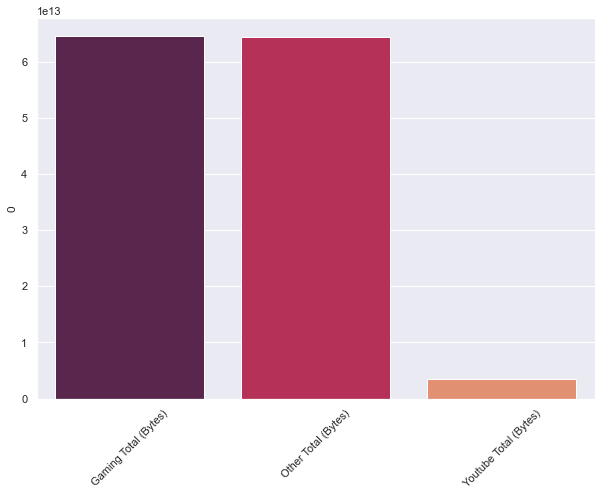

In [48]:
plt.figure(figsize=(10,7))
sns.barplot(x=top3.index,y=top3[0],palette='rocket')
plt.xticks(rotation=45)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


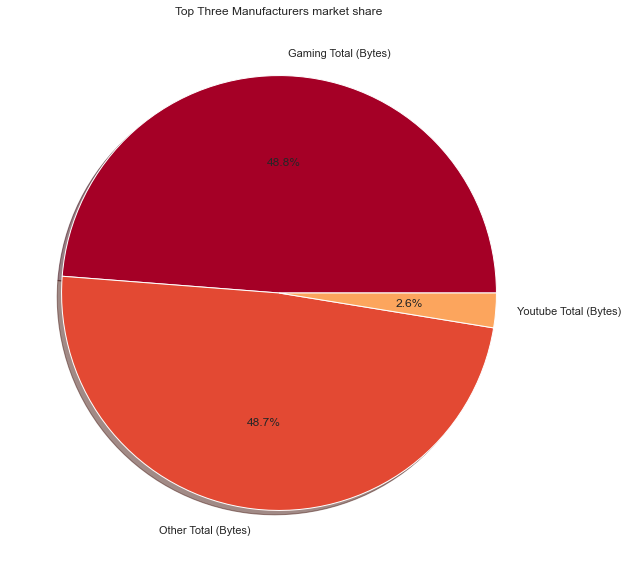

In [49]:
cmap = plt.get_cmap('RdYlGn')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.figure(figsize=(15,10))
plt.pie(top3,shadow=True,colors=colors,autopct='%1.1f%%',labels=top3.index)
plt.title("Top Three Manufacturers market share")
plt.show()

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

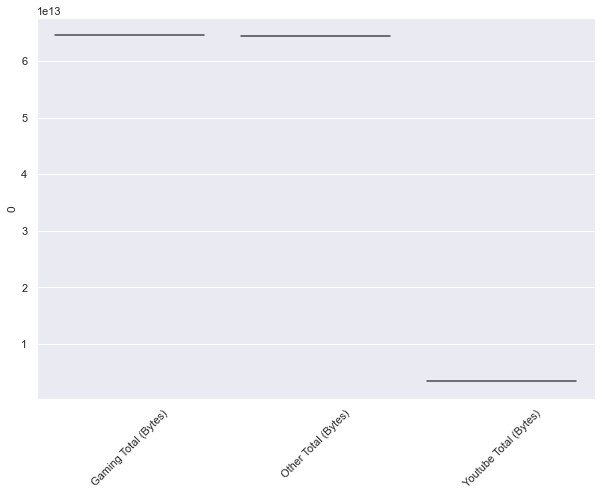

In [50]:
plt.figure(figsize=(10,7))
sns.boxenplot(x=top3.index,y=top3[0], palette='rainbow')
plt.xticks(rotation=45)

## Clustering Users

In [51]:
#using our previously normalized data 
normalizedData

array([[-0.16089109, -0.03685698, -0.49499518],
       [ 0.18363006, -1.00237154, -0.49499518],
       [-0.06343075, -0.23097391, -0.49499518],
       ...,
       [ 3.90150513, -0.69200904, -0.49499518],
       [ 0.56708407, -0.64388497, -0.49499518],
       [ 3.86123178, -0.89408478, -0.49499518]])

In [52]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(normalizedData)
    Sum_of_squared_distances.append(km.inertia_)


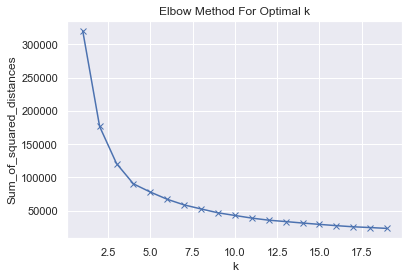

In [53]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the elbow method whereby we seet the k value just before the squared distance error stagnates in this our optimal k value will be 6 

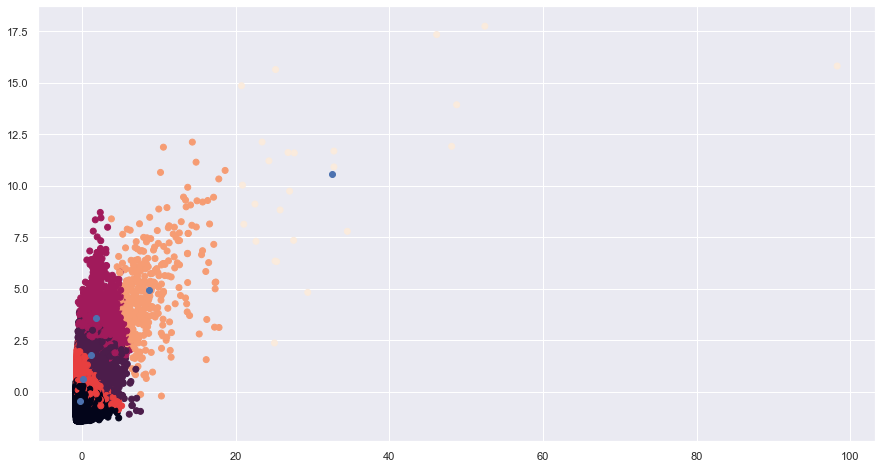

In [54]:
#Lets plot and see how this looks
knn=Models(normalizedData)
knn.visualizePlot(6,'b',cmap='RdPu')

In [55]:
clusters=knn.knnPreds(6)
clusters

array([0, 0, 0, ..., 3, 0, 0])

In [56]:
knn=Models(skewedData)
clusters=knn.knnPreds(6)

In [57]:
skewedData['Engagement Cluster']=clusters
skewedData.groupby(['Engagement Cluster']).agg({'Dur. (ms).1':np.mean,'Total Session (Mbs)':np.mean,'No Sessions':np.mean})

,Dur. (ms).1,Total Session (Mbs),No Sessions
Engagement Cluster,,,
0,769.043409,933.653870,1.098494
1,4294.213361,2780.697103,3.084455
2,34701.711389,7361.641297,8.388889
3,111499.718000,13644.807783,16.200000
4,12497.611957,3934.719883,4.482280
5,2007.368198,1428.563008,1.588868


In [58]:
skewed=skewedData.reset_index()

In [59]:

finalCluster=skewed[['MSISDN/Number','Engagement Cluster']]
finalDF=pd.merge(finalCluster, data2, on='MSISDN/Number')
finalDF

,MSISDN/Number,Engagement Cluster,Handset Type,IMEI,Last Location Name,IMSI,Handset Manufacturer,Bearer Id,Dur. (ms).1,Avg RTT DL (ms),...,Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes),Avg Bearer TP DL (Mbps),Avg Bearer TP UL (Mbps),Activity Duration DL (s),Activity Duration UL (s),Total UL+DL (Bytes),Total Session (Mbs)
0,3.360100e+10,0,Huawei P20 Lite Huawei Nova 3E,8.627420e+13,L74538A,2.082014e+14,Huawei,1,1167.20,46.000000,...,21624548.0,27180981.0,8.124587e+08,386570872.0,0.036133,0.038086,26.588,33.662,8.786906e+08,1197.612347
1,3.360100e+10,5,Apple iPhone 7 (A1778),3.553261e+13,D12741B,2.082015e+14,Apple,1,1812.30,30.000000,...,12432223.0,11221763.0,1.197501e+08,281710071.0,0.046875,0.049805,49.283,54.751,1.568596e+08,416.200012
2,3.360100e+10,0,undefined,3.561271e+13,L96414B,2.082019e+14,undefined,1,1349.69,109.795706,...,21333570.0,19353900.0,5.388277e+08,501693672.0,0.046875,0.047852,16.793,18.434,5.959665e+08,1040.509209
3,3.360101e+10,0,Apple iPhone 5S (A1457),3.520491e+13,D93721A,2.082017e+14,Apple,1,498.78,69.000000,...,6977321.0,1942092.0,3.911261e+08,35279702.0,0.199219,0.042969,12.097,4.497,4.223207e+08,426.834773
4,3.360101e+10,0,Apple iPhone Se (A1723),3.530681e+13,D54104C,2.082015e+14,Apple,2,371.04,114.000000,...,41533002.0,49201724.0,1.314798e+09,804804484.0,39.448242,16.063477,4642.908,3133.148,1.457411e+09,2131.514222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119024,3.379000e+10,0,Huawei Honor 9 Lite,8.687980e+13,T93842C,2.082014e+14,Huawei,1,88.10,42.000000,...,26647843.0,14902538.0,6.603614e+08,295282817.0,9.744141,0.377930,259.862,241.044,7.146416e+08,959.427761
119025,3.379000e+10,0,Apple iPhone 8 Plus (A1897),3.529761e+13,D42155B,2.082010e+14,Apple,1,1409.88,34.000000,...,19851572.0,8531060.0,4.370033e+08,211115113.0,0.066406,0.046875,33.435,39.006,4.803073e+08,653.212936
119026,3.197021e+12,1,Quectel Wireless. Quectel Ec25-E,8.667580e+13,L70386B,2.040808e+14,Quectel Wireless Solutions Co Ltd,1,8773.85,109.795706,...,11959905.0,26592300.0,1.780487e+08,470526473.0,0.000977,0.000000,0.000,0.000,2.321240e+08,667.383262
119027,3.370000e+14,5,Huawei B525S-23A,8.619200e+13,T89979A,2.082095e+14,Huawei,1,2530.30,109.795706,...,36734940.0,30905042.0,5.101427e+08,149188439.0,0.010742,0.021484,8.829,10.540,5.962878e+08,706.331140


In [82]:
finalDF.to_csv('../data/clustered6.csv',index=False)

In [84]:
#we pickle the model with its parameters
import pickle 

from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=6)
kmeans.fit(normalizedData)

pickle.dump(kmeans,open('../models/knn.pkl','wb'))

